In [66]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split as tts

import matplotlib.pyplot as plt
%matplotlib inline

stats:

G = games played\
GS = games started\
MP = minutes played\
PER = player efficiency rating\
TS%	= true shooting percentage (point/(2 x TSA) (a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.)\
3PAr = 3-Point Attempt Rate (3PA / FGA)\
FTr	= Free Throw Rate or FTR is the ratio of Free Throw Attempts to Field Goal Attempts.\
ORB% = Offensive Rebound Percentage\
DRB% = Defensive Rebound Percentage\
TRB% = Total Rebound Percentage\
AST% = Assist Percentage\
STL% = steal percentage\
BLK% = block percentage\
TOV% = Turnover Percentage\
USG% = Usage Percentage\
blanl	\
OWS = Offensive Win Shares\
DWS	= Defensive Win Shares\
WS = Win Shares; an estimate of the number of wins contributed by a player\
WS/48 = Win Shares Per 48 Minutes\
blank2	\
OBPM = offensive Box Plus/Minus\
DBPM = defensive Box Plus/Minus\
BPM	= Box Plus/Minus, metric for evaluating basketball players' quality and contribution to the team\
VORP = Value Over Replacement Player\
FG = Field Goals\
FGA	= Field Goal attempts\
FG%	= Field Goals percentage\
3P = 3 pointers\
3PA	= 3 point attempts\
3P%	= 3 point percentage\
2P = 2-Point Field Goals\
2PA	= 2-Point Field Goals attempts\
2P%	= 2-Point Field Goals percentage\
eFG% = Effective Field Goal Percentage\
FT = Free Throws\
FTA	= Free Throws attempts\
FT%	= Free Throws percentage\
ORB	= Offensive Rebound\
DRB	= defensive rebound\
TRB	= total rebound\
AST	= assists\
STL	= steals\
BLK	= blocks\
TOV	= turnovers\
PF = personal fouls\
PTS = points\

In [2]:
df = pd.read_csv('nbaplayers1718_2.csv')

In [3]:
df[' Player Salary in $ '] = df[' Player Salary in $ '].str.replace(' ', '')
df[' Player Salary in $ '] = df[' Player Salary in $ '].str.replace('$', '')
df[' Player Salary in $ '] = df[' Player Salary in $ '].str.replace(',', '')
df[' Player Salary in $ '] = pd.to_numeric(df[' Player Salary in $ '])

In [4]:
df.drop(columns=['blanl', 'blank2'], inplace=True)

In [5]:
df.describe()

#  Season Start   Player Salary in $          Age  \
count    486.000000         486.0          4.230000e+02  486.000000   
mean   24392.170782        2017.0          7.380453e+06   26.405350   
std      171.748286           0.0          7.629048e+06    4.345194   
min    24096.000000        2017.0          1.722400e+04   19.000000   
25%    24242.250000        2017.0          1.545752e+06   23.000000   
50%    24392.500000        2017.0          4.046760e+06   26.000000   
75%    24541.750000        2017.0          1.149252e+07   29.000000   
max    24690.000000        2017.0          3.468255e+07   40.000000   

                G          GS           MP         PER         TS%  \
count  486.000000  486.000000   486.000000  486.000000  485.000000   
mean    53.783951   25.308642  1223.051440   13.020782    0.526944   
std     24.835638   28.715875   842.438143    5.762420    0.089771   
min      1.000000    0.000000     1.000000  -17.600000    0.000000   
25%     35.250000    1.000000   449.500000    9.800000    0.502000   
50%     62.500000   11.000000  1197.500000   12.800000    0.537000   
75%     75.000000   49.750000  1942.250000   15.800000    0.576000   
max     82.000000   82.000000  3048.000000   31.500000    0.799000   

             3PAr         FTr        ORB%        DRB%        TRB%        AST%  \
count  485.000000  485.000000  486.000000  486.000000  486.000000  486.000000   
mean     0.314058    0.270179    5.067901   15.211934   10.145267   13.067695   
std      0.209748    0.180287    4.246585    7.337450    5.201848    9.172849   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.156000    0.165000    1.900000   10.325000    6.225000    6.525000   
50%      0.324000    0.237000    3.550000   14.050000    8.950000   10.100000   
75%      0.455000    0.339000    7.700000   18.875000   13.100000   17.575000   
max      1.000000    2.000000   26.300000  100.000000   56.400000   57.300000   

             STL%        BLK%        TOV%        USG%         OWS         DWS  \
count  486.000000  486.000000  485.000000  486.000000  486.000000  486.000000   
mean     1.545062    1.664403   12.809072   18.608848    1.335597    1.243416   
std      0.923243    1.690613    5.332382    5.597041    2.081620    1.085874   
min      0.000000    0.000000    0.000000    0.000000   -1.700000    0.000000   
25%      1.100000    0.500000    9.600000   14.600000    0.000000    0.400000   
50%      1.400000    1.200000   12.400000   18.100000    0.600000    1.000000   
75%      1.900000    2.400000   15.400000   21.500000    2.000000    1.875000   
max     11.100000   17.300000   43.600000   41.700000   11.500000    6.000000   

               WS       WS/48        OBPM        DBPM         BPM        VORP  \
count  486.000000  486.000000  486.000000  486.000000  486.000000  486.000000   
mean     2.580247    0.077249   -1.397531   -0.304733   -1.701852    0.616667   
std      2.898265    0.082869    3.396019    2.033137    4.220521    1.454814   
min     -0.800000   -0.473000  -22.400000   -7.100000  -26.900000   -1.400000   
25%      0.400000    0.041000   -2.900000   -1.600000   -3.600000   -0.100000   
50%      1.800000    0.082000   -1.300000   -0.300000   -1.500000    0.100000   
75%      3.775000    0.116750    0.175000    0.900000    0.375000    0.900000   
max     15.000000    0.480000   11.800000   12.000000   15.600000   12.400000   

               FG          FGA         FG%          3P         3PA  \
count  486.000000   486.000000  485.000000  486.000000  486.000000   
mean   197.656379   432.337449    0.441268   48.864198  136.676955   
std    174.667670   371.858588    0.099094   56.011800  147.204832   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%     55.000000   120.250000    0.399000    3.000000   10.000000   
50%    160.500000   361.000000    0.442000   28.500000   94.000000   
75%    289.750000   633.750000    0.485000   78.000000  220.000000 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #                     486 non-null    int64  
 1   Season Start          486 non-null    int64  
 2   Player Name           486 non-null    object 
 3    Player Salary in $   423 non-null    float64
 4   Pos                   486 non-null    object 
 5   Age                   486 non-null    int64  
 6   Tm                    486 non-null    object 
 7   G                     486 non-null    int64  
 8   GS                    486 non-null    int64  
 9   MP                    486 non-null    int64  
 10  PER                   486 non-null    float64
 11  TS%                   485 non-null    float64
 12  3PAr                  485 non-null    float64
 13  FTr                   485 non-null    float64
 14  ORB%                  486 non-null    float64
 15  DRB%                  4

In [7]:
hmm = df.fillna({'TS%':df['TS%'].mean(),
            '3PAr':df['3PAr'].mean(),
            'FTr':df['FTr'].mean(),
            'TOV%':df['TOV%'].mean(),
            'FG%':df['FG%'].mean(),
            '3P%':df['3P%'].mean(),
            '2P%':df['2P%'].mean(),
           'eFG%':df['eFG%'].mean(),
           'FT%':df['FT%'].mean()})

In [8]:
hmm = hmm.dropna()

In [9]:
hmm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 485
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #                     423 non-null    int64  
 1   Season Start          423 non-null    int64  
 2   Player Name           423 non-null    object 
 3    Player Salary in $   423 non-null    float64
 4   Pos                   423 non-null    object 
 5   Age                   423 non-null    int64  
 6   Tm                    423 non-null    object 
 7   G                     423 non-null    int64  
 8   GS                    423 non-null    int64  
 9   MP                    423 non-null    int64  
 10  PER                   423 non-null    float64
 11  TS%                   423 non-null    float64
 12  3PAr                  423 non-null    float64
 13  FTr                   423 non-null    float64
 14  ORB%                  423 non-null    float64
 15  DRB%                  4

In [10]:
hmm[hmm['Player Name']=='LeBron James']


#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
293  24365          2017  LeBron James            33285709.0  SF   32  CLE   

      G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  \
293  74  74  2794  27.0  0.619  0.254  0.395   4.0  20.7  12.6  41.3   1.6   

     BLK%  TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  VORP   FG  \
293   1.3  16.1  30.0  9.8  3.0  12.9  0.221   6.8   1.6  8.4   7.3  736   

      FGA    FG%   3P  3PA    3P%   2P   2PA   2P%  eFG%   FT  FTA    FT%  \
293  1344  0.548  124  342  0.363  612  1002  0.61  0.59  358  531  0.674   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
293   97  543  640  646   92   44  303  134  1954

In [11]:
y = hmm[' Player Salary in $ ']
X = hmm.drop(columns=['#', 'Season Start', 'Player Name', ' Player Salary in $ ', 'Pos', 'Tm'])

In [12]:
rf_everything = RandomForestRegressor()
rf_everything.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [13]:
rf_everything.score(X,y)

0.94878635866119

In [14]:
X_train, X_test, y_train, y_test = tts(X,y)

In [15]:
rf2 = RandomForestRegressor()
rf2.fit(X_train,y_train)
rf2.score(X_test,y_test)

0.6239883467636771

In [16]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.5634727464895691

In [17]:
df.columns

Index(['#', 'Season Start', 'Player Name', ' Player Salary in $ ', 'Pos',
       'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [18]:
columns = ['Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

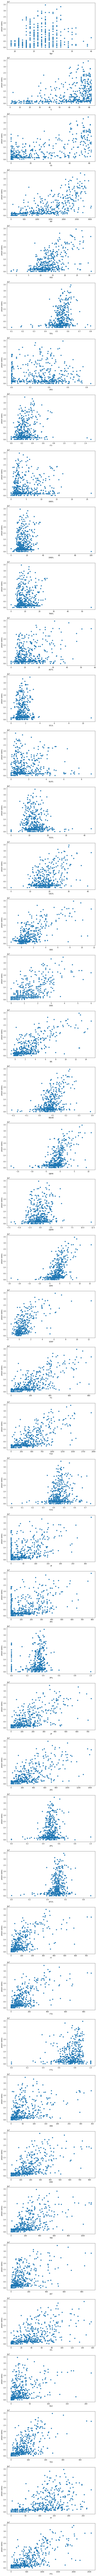

In [19]:
fig, ax = plt.subplots(len(columns),1, figsize=(10,300))
for i, col in enumerate(columns):
    ax[i].scatter(hmm[col], hmm[' Player Salary in $ '])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [20]:
lower_than_20 = hmm[hmm[' Player Salary in $ ']<20000000]

In [21]:
y_20 = lower_than_20[' Player Salary in $ ']
X_20 = lower_than_20.drop(columns=['#', 'Season Start', 'Player Name', ' Player Salary in $ ', 'Pos', 'Tm'])

In [22]:
X_20_train, X_20_test, y_20_train, y_20_test = tts(X_20,y_20)

In [23]:
rf_20 = RandomForestRegressor()
rf_20.fit(X_20_train,y_20_train)
rf_20.score(X_20_test,y_20_test)

0.4867018690889023

In [24]:
gb_20 = GradientBoostingRegressor()
gb_20.fit(X_20_train,y_20_train)
gb_20.score(X_20_test,y_20_test)

0.46290799183984616

In [25]:
def get_x_y(df):
    y = df[' Player Salary in $ ']
    X = df.drop(columns=['#', 'Season Start', 'Player Name', ' Player Salary in $ ', 'Pos', 'Tm'])
    return X, y

In [26]:
bron_X, bron_y = get_x_y(hmm[hmm['Player Name']=='LeBron James'])

In [27]:
bron_y

293    33285709.0
Name:  Player Salary in $ , dtype: float64

In [28]:
gb_20.predict(bron_X)

array([16977096.7421571])

In [29]:
gb.predict(bron_X)

array([31784557.25434798])

In [30]:
rf2.predict(bron_X)

array([29295304.38])

In [31]:
rf_everything.predict(bron_X)

array([30315910.53])

In [32]:
curry_X, curry_y = get_x_y(hmm[hmm['Player Name']=='Stephen Curry'])

In [33]:
curry_y

425    34682550.0
Name:  Player Salary in $ , dtype: float64

In [35]:
rf_everything.predict(curry_X)

array([30266218.11])

In [36]:
rf2.predict(curry_X)

array([30056343.28])

In [37]:
gb.predict(curry_X)

array([33011246.09174935])

In [39]:
gb_20.predict(curry_X)

array([12066725.77871481])

(array([28.,  4.,  4., 39., 46., 11., 34., 11., 11., 14.,  6.,  7.,  8.,
         4., 10.,  7.,  3., 10.,  4.,  5.,  5.,  9.,  3.,  3.,  4.,  3.,
         2.,  1.,  6.,  2.,  8.,  4.,  1.,  2.,  5.,  3.,  4.,  5.,  0.,
         3.,  6.,  2.,  3.,  0.,  5.,  0.,  3.,  3.,  6.,  2.,  0.,  5.,
         2.,  0.,  3.,  2.,  2.,  2.,  0.,  2.,  1.,  1.,  0.,  1.,  3.,
         4.,  3.,  1.,  4.,  1.,  1.,  1.,  1.,  0.,  1.,  2.,  0.,  0.,
         0.,  2.,  0.,  1.,  3.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([1.72240000e+04, 3.63877260e+05, 7.10530520e+05, 1.05718378e+06,
        1.40383704e+06, 1.75049030e+06, 2.09714356e+06, 2.44379682e+06,
        2.79045008e+06, 3.13710334e+06, 3.48375660e+06, 3.83040986e+06,
        4.17706312e+06, 4.52371638e+06, 4.87036964e+06, 5.21702290e+06,
        5.56367616e+06, 5.91032942e+06, 6.25698268e+06, 6.60363594e+06,
        6.95028920e+06, 7.29694246e+06, 7.64359572e+06, 7.99024898e+06,
  

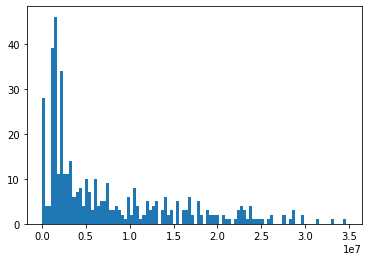

In [40]:
plt.hist(y,bins=100)

In [46]:
above_1_mil_x, above_1_mill_y = get_x_y(hmm[hmm[' Player Salary in $ ']>1000000])

In [47]:
above_1_mil_x_train, above_1_mil_x_test, above_1_mill_y_train, above_1_mill_y_test = tts(above_1_mil_x,above_1_mill_y)

In [48]:
gb_above_1_mil = GradientBoostingRegressor()
gb_above_1_mil.fit(above_1_mil_x_train,above_1_mill_y_train)
gb_above_1_mil.score(above_1_mil_x_test,above_1_mill_y_test)

0.6625252763106387

In [49]:
gb_above_1_mil.predict(bron_X)

array([31384920.3400433])

In [50]:
gb_above_1_mil.predict(curry_X)

array([33164081.75737847])

In [51]:
under_20_mil_X, under_20_mil_y = get_x_y(hmm[hmm[' Player Salary in $ ']<20000000])

In [52]:
under_20_mil_X_train, under_20_mil_X_test, under_20_mil_y_train, under_20_mil_y_test = tts(under_20_mil_X,under_20_mil_y)

In [53]:
gb_under_20_mil = GradientBoostingRegressor()
gb_under_20_mil.fit(under_20_mil_X_train,under_20_mil_y_train)
gb_under_20_mil.score(under_20_mil_X_test,under_20_mil_y_test)

0.5914375016627907

In [54]:
gb_under_20_mil.predict(bron_X)

array([15377379.81600933])

In [55]:
gb_under_20_mil.predict(curry_X)

array([12136564.61365969])

In [56]:
gb_under_20_mil_2 = GradientBoostingRegressor()
gb_under_20_mil_2.fit(under_20_mil_X,under_20_mil_y)
gb_under_20_mil_2.score(under_20_mil_X,under_20_mil_y)

0.9360609467662263

In [57]:
gb_under_20_mil_2.predict(bron_X)

array([14490255.26781288])

In [58]:
gb_under_20_mil_2.predict(curry_X)

array([12634813.1577657])

In [59]:
smart_X, smart_y = get_x_y(hmm[hmm['Player Name']=='Marcus Smart'])

In [60]:
gb_under_20_mil_2.predict(smart_X)

array([4493361.55566513])

In [61]:
hmm[hmm['Player Name']=='Marcus Smart']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
312  24588          2017  Marcus Smart             4538020.0  SG   22  BOS   

      G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  \
312  79  24  2399  12.0  0.486  0.443  0.334   3.7  10.5   7.1  22.0   2.6   

     BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP   FG  FGA  \
312   1.2  15.6  18.8  0.5  2.7  3.2  0.064  -1.1   0.9 -0.3   1.0  269  749   

       FG%  3P  3PA    3P%   2P  2PA   2P%  eFG%   FT  FTA    FT%  ORB  DRB  \
312  0.359  94  332  0.283  175  417  0.42  0.42  203  250  0.812   78  228   

     TRB  AST  STL  BLK  TOV   PF  PTS  
312  306  364  125   34  159  192  835

In [63]:
hmm2 = hmm[(hmm[' Player Salary in $ ']>1000000) & (hmm[' Player Salary in $ ']<30000000)]

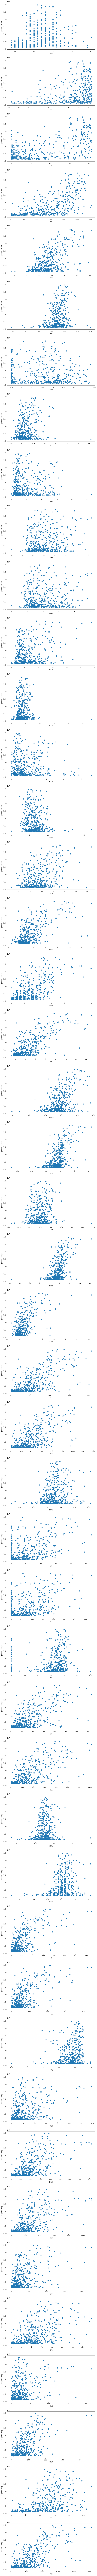

In [64]:
fig, ax = plt.subplots(len(columns),1, figsize=(10,300))
for i, col in enumerate(columns):
    ax[i].scatter(hmm2[col], hmm2[' Player Salary in $ '])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [74]:
hmm2['stl squared'] = (hmm['STL'])**2

C:\Users\jooki\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
hmm2['pts sqrt'] = np.sqrt(hmm2['PTS'])

C:\Users\jooki\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
hmm2['stl log'] = np.log(hmm2['STL'])

C:\Users\jooki\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jooki\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
hmm2

#  Season Start      Player Name   Player Salary in $  Pos  Age   Tm  \
0    24304          2017     A.J. Hammons             1312611.0   C   24  DAL   
1    24165          2017     Aaron Brooks             2116955.0  PG   32  IND   
2    24289          2017     Aaron Gordon             5504420.0  SF   21  ORL   
5    24343          2017       Al Horford            27734405.0   C   30  BOS   
6    24366          2017     Al Jefferson             9769821.0   C   32  IND   
..     ...           ...              ...                   ...  ..  ...  ...   
481  24192          2017  Wilson Chandler            12016854.0  SF   29  DEN   
482  24259          2017     Yogi Ferrell             1312611.0  PG   23  TOT   
483  24408          2017      Zach LaVine             3202217.0  SG   21  MIN   
484  24550          2017    Zach Randolph            12307692.0  PF   35  MEM   
485  24515          2017    Zaza Pachulia             3477600.0   C   32  GSW   

      G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  \
0    22   0   163   8.4  0.472  0.238  0.476   5.4  20.9  12.8   3.8   0.3   
1    65   0   894   9.5  0.507  0.427  0.133   2.3   6.3   4.3  20.7   1.4   
2    80  72  2298  14.4  0.530  0.309  0.251   5.3  14.1   9.6  10.5   1.4   
5    68  68  2193  17.7  0.553  0.302  0.169   4.9  18.6  11.8  24.4   1.2   
6    66   1   931  18.9  0.526  0.002  0.180   9.2  24.2  16.8  11.0   1.0   
..   ..  ..   ...   ...    ...    ...    ...   ...   ...   ...   ...   ...   
481  71  33  2197  14.9  0.545  0.347  0.207   5.2  17.7  11.5   9.8   1.2   
482  46  29  1197  13.1  0.533  0.447  0.226   1.8   9.2   5.3  23.2   1.8   
483  47  47  1749  14.6  0.576  0.437  0.197   1.2   9.5   5.3  12.6   1.2   
484  73   5  1786  18.5  0.490  0.098  0.200  11.3  27.4  19.1  13.5   1.1   
485  70  70  1268  16.1  0.588  0.007  0.410  12.9  22.0  17.7  13.6   2.2   

     BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP   FG  FGA  \
0     7.2  16.4  17.6 -0.2  0.2  0.0 -0.001  -7.5   1.9 -5.6  -0.1   17   42   
1     0.9  17.2  19.2 -0.2  0.5  0.3  0.016  -2.1  -2.6 -4.6  -0.6  121  300   
2     1.4   8.5  20.1  2.0  1.7  3.7  0.076  -0.2  -0.4 -0.7   0.8  393  865   
5     3.3  11.9  19.8  3.6  2.7  6.3  0.137   1.0   2.1  3.1   2.8  379  801   
6     1.5   6.1  26.1  1.2  1.1  2.3  0.119  -1.5  -1.5 -3.1  -0.3  235  471   
..    ...   ...   ...  ...  ...  ...    ...   ...   ...  ...   ...  ...  ...   
481   1.1  10.0  22.0  2.4  1.1  3.6  0.078   0.5  -1.3 -0.8   0.7  433  939   
482   0.7  13.9  19.6  0.8  1.0  1.8  0.072  -0.1  -0.7 -0.7   0.4  160  394   
483   0.5   9.9  21.7  2.5  0.4  3.0  0.082   2.1  -2.4 -0.3   0.8  326  710   
484   0.5   8.6  29.2  0.8  2.4  3.2  0.086  -1.4  -0.7 -2.1   0.0  433  964   
485   2.0  19.5  15.3  2.2  2.5  4.7  0.177  -0.3   3.0  2.7   1.5  164  307   

       FG%   3P  3PA    3P%   2P  2PA   2P%  eFG%   FT  FTA    FT%  ORB  DRB  \
0    0.405    5   10  0.500   12   32  0.38  0.46    9   20  0.450    8   28   
1    0.403   48  128  0.375   73  172  0.42  0.48   32   40  0.800   18   51   
2    0.454   77  267  0.288  316  598  0.53  0.50  156  217  0.719  116  289   
5    0.473   86  242  0.355  293  559  0.52  0.53  108  135  0.800   95  369   
6    0.499    0    1  0.000  235  470  0.50  0.50   65   85  0.765   75  203   
..     ...  ...  ...    ...  ...  ...   ...   ...  ...  ...    ...  ...  ...   
481  0.461  110  326  0.337  323  613  0.53  0.52  141  194  0.727  103  356   
482  0.406   68  176  0.386   92  218  0.42  0.49   74   89  0.831   20   91   
483  0.459  120  310  0.387  206  400  0.52  0.54  117  140  0.836   18  141   
484  0.449   21   94  0.223  412  870  0.47  0.46  141  193  0.731  182  416   
485  0.534    0    2  0.000  164  305  0.54  0.53   98  126  0.778  140  270   

     TRB  AST  STL  BLK  TOV   PF   PTS  stl sqrt  stl squared  pts squared  \
0     36    4    1   13   10   21    48  1.000000            1     6.928203   
1     69  125   25 

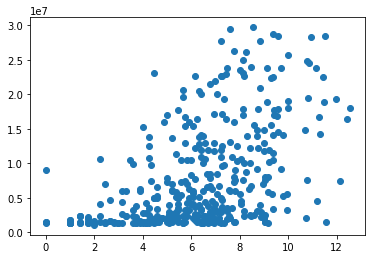

In [76]:
plt.scatter(hmm2['stl sqrt'], hmm2[' Player Salary in $ '])

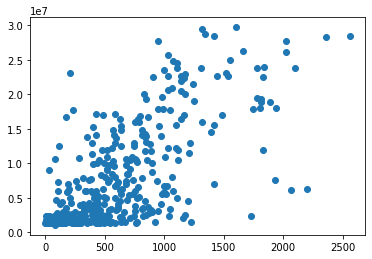

In [86]:
plt.scatter(hmm2['PTS'], hmm2[' Player Salary in $ '])

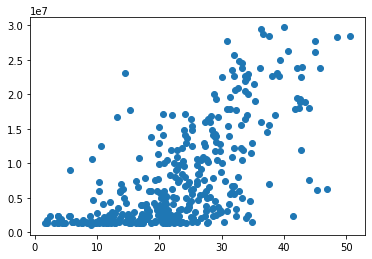

In [88]:
plt.scatter(hmm2['pts sqrt'], hmm2[' Player Salary in $ '])

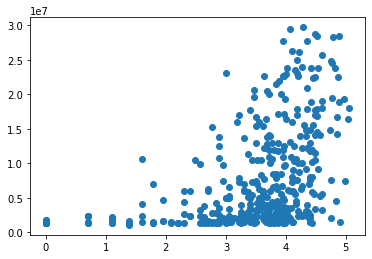

In [92]:
plt.scatter(hmm2['stl log'], hmm2[' Player Salary in $ '])

In [77]:
new_X, new_y = get_x_y(hmm2)

In [79]:
new_X['salary'] = new_y

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2C7D12488>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

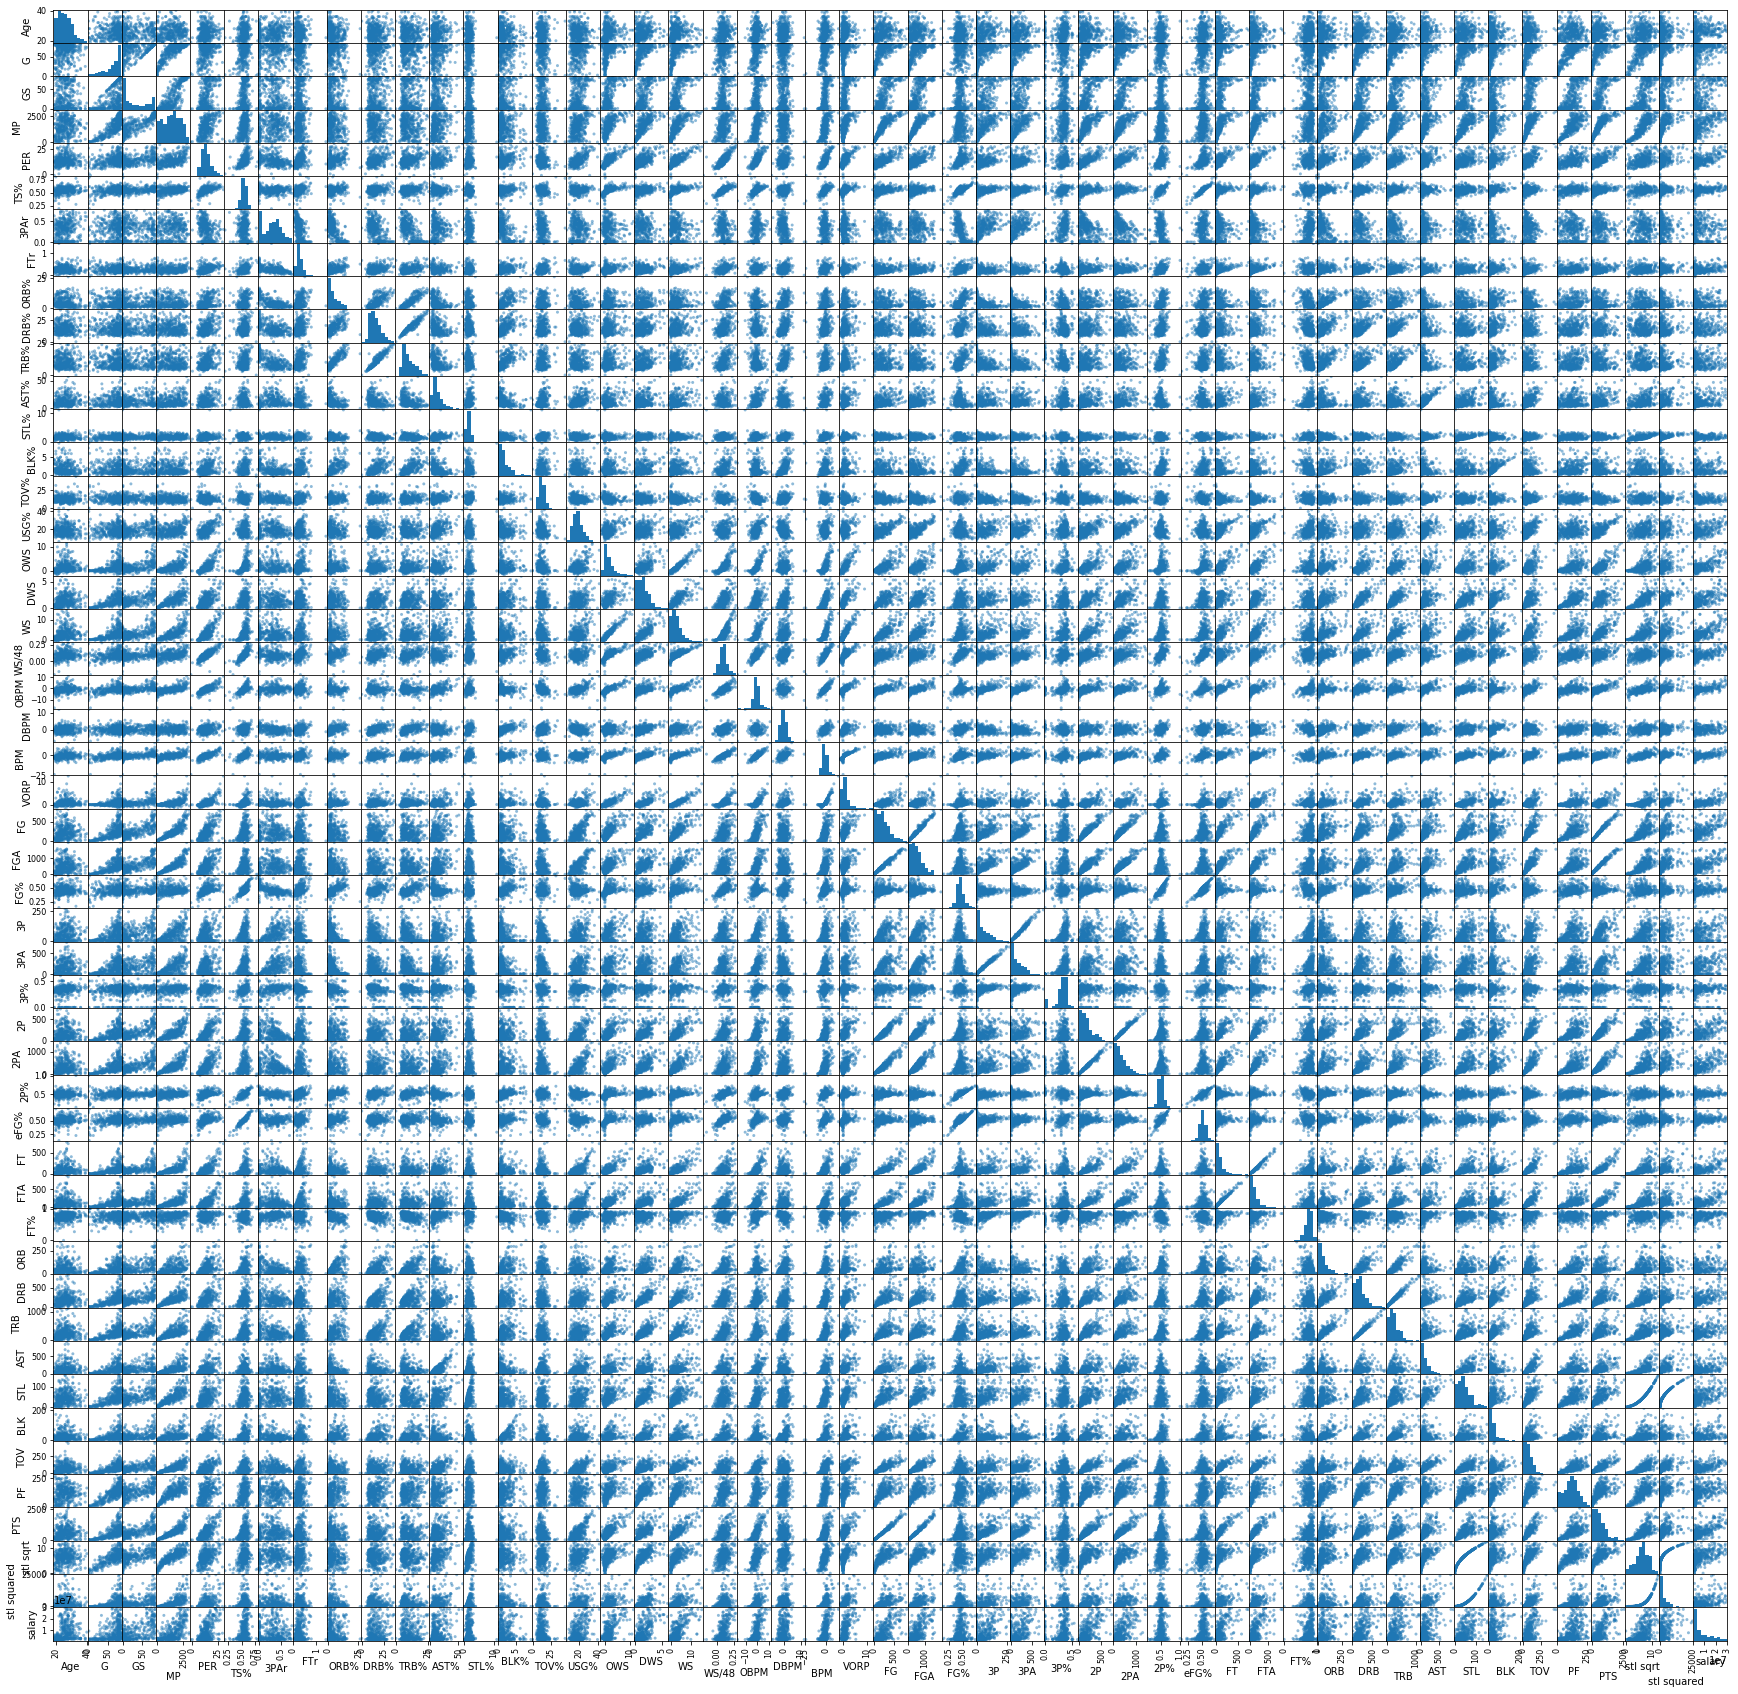

In [81]:
scatter_matrix(new_X, figsize=(30,30))